In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import os
import sys
if os.path.abspath("../") not in sys.path:
    sys.path.append(os.path.abspath("../"))
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib import rcParams
import h5py
import hashlib
import time
from typing import List
import aux_analysis as aux
from sklearn import manifold
from sklearn import decomposition
from synapsbi.utils import apply_n_conditions, load_and_merge
from sbi.analysis import pairplot

color_pi0 = (127/255, 127/255, 127/255)
color_pi1 = (27/255, 158/256, 119/255)
color_pi2 = (217/255, 95/256, 2/255)
color_pi3 = (117/256, 112/256, 179/256)

color_ee = "#A52A2A"
color_ei = (242/256, 140/256, 40/256)
color_ie = (8/256, 143/256, 143/256)
color_ii = (47/256, 85/256, 151/256)

#### Load polynomial samples

In [34]:
save_dir_poly = "../data_synapsesbi/bg_IF_EEEIIEII_6pPol/"

#rules that were plausible on the 2min task simulated for 20min on the same stability task
dataset_poly = load_and_merge(save_dir_poly,
                         ("bg20min_metrics.npy",
                          ))

retrieved 14163/14163 simulations


In [35]:
cond_no_nan = ("rate", 0, 1000)
cond_r = ("rate", 1, 50)
cond_cv = ("cv_isi", 0.7, 1000)
cond_sf = ("spatial_Fano", 0.5, 2.5)
cond_tf = ("temporal_Fano", 0.5, 2.5)
cond_ac = ("auto_cov", 0, 0.1)
cond_fft = ("fft", 0, 1)
cond_wb = ("w_blow", 0, 0.1)
cond_srt = ("std_rate_temporal", 0, 0.5)
cond_srs = ("std_rate_spatial", 0, 5)
cond_scv = ("std_cv", 0, 0.2)
cond_wc = ("w_creep", 0, 0.05)
cond_ri = ("rate_i", 1, 50)
cond_weef =("weef", 0 ,0.5)
cond_weif =("weif", 0 ,0.5)
cond_wief =("wief", 0 ,5)
cond_wiif =("wiif", 0 ,5)

cond_all_poly = (cond_r,cond_ri,
            cond_wb,cond_wc,cond_weef,cond_weif, cond_wief, cond_wiif,
            cond_ac,cond_cv,cond_fft,cond_srt,cond_srs,cond_sf,cond_tf)
cond_stable_r = (cond_r, cond_ri)
cond_stable_w_poly = (cond_wb,cond_wc,cond_weef,cond_weif, cond_wief, cond_wiif)
cond_AI = (cond_ac,cond_cv,cond_fft,cond_srt,cond_srs,cond_sf,cond_tf)


condition_poly = apply_n_conditions(dataset_poly, (cond_no_nan,))

print("Keeping", np.sum(condition_poly), "simulations out of", len(dataset_poly), np.sum(condition_poly)/len(dataset_poly)*100,"%")

Keeping 14146 simulations out of 14163 99.87996893313563 %


In [48]:
#make fake metric that tags the stable sims on the long simulation
stable_poly = np.zeros(len(dataset_poly), dtype=np.int32)
stable_poly[apply_n_conditions(dataset_poly, cond_all_poly)] = 1
stable_poly = stable_poly[condition_poly]

In [49]:
alpha_EE = dataset_poly[condition_poly]['theta'][:,2]
beta_EE = dataset_poly[condition_poly]['theta'][:,3]
alpha_EI = dataset_poly[condition_poly]['theta'][:,8]
beta_EI = dataset_poly[condition_poly]['theta'][:,9]
alpha_IE = dataset_poly[condition_poly]['theta'][:,14]
beta_IE = dataset_poly[condition_poly]['theta'][:,15]
alpha_II = dataset_poly[condition_poly]['theta'][:,20]
beta_II = dataset_poly[condition_poly]['theta'][:,21]


r_poly = dataset_poly[condition_poly]['rate']
cv_poly = dataset_poly[condition_poly]['cv_isi']
kl_poly = dataset_poly[condition_poly]['kl_isi']
sf_poly = dataset_poly[condition_poly]['spatial_Fano']
tf_poly = dataset_poly[condition_poly]['temporal_Fano']
ac_poly = dataset_poly[condition_poly]['auto_cov']
fft_poly = dataset_poly[condition_poly]['fft']
wb_poly = dataset_poly[condition_poly]['w_blow']
srt_poly = dataset_poly[condition_poly]['std_rate_temporal']
srs_poly = dataset_poly[condition_poly]['std_rate_spatial']
scv_poly = dataset_poly[condition_poly]['std_cv']
ri_poly = dataset_poly[condition_poly]['rate_i']
wc_poly = dataset_poly[condition_poly]['w_creep']
weef_poly = dataset_poly[condition_poly]['weef']
weif_poly = dataset_poly[condition_poly]['weif']
wief_poly = dataset_poly[condition_poly]['wief']
wiif_poly = dataset_poly[condition_poly]['wiif']

#### Load MLP samples

In [50]:
save_dir_MLP = "../data_synapsesbi/bg_CVAIF_EEIE_T4wvceciMLP/"

dataset_MLP = load_and_merge(save_dir_MLP,
                         ("bg20min_metrics.npy",
                         ))

retrieved 15000/15000 simulations


In [51]:
cond_all_MLP = (cond_r,cond_ri,
            cond_wb,cond_wc,cond_weef, cond_wief,
            cond_ac,cond_cv,cond_fft,cond_srt,cond_srs,cond_sf,cond_tf)
cond_stable_r = (cond_r, cond_ri)
cond_stable_w_MLP = (cond_wb,cond_wc,cond_weef, cond_wief)
cond_AI = (cond_ac,cond_cv,cond_fft,cond_srt,cond_srs,cond_sf,cond_tf)


condition_MLP = apply_n_conditions(dataset_MLP, (cond_no_nan,))

print("Keeping", np.sum(condition_MLP), "simulations out of", len(dataset_MLP), np.sum(condition_MLP)/len(dataset_MLP)*100,"%")

Keeping 14346 simulations out of 15000 95.64 %


In [52]:
stable_MLP = np.zeros(len(dataset_MLP))
stable_MLP[apply_n_conditions(dataset_MLP, cond_all_MLP)] = 1
stable_MLP = stable_MLP[condition_MLP]

In [53]:
thetas_MLP = dataset_MLP[condition_MLP]['theta'][:,:-1]
input_rate_MLP = dataset_MLP[condition_MLP]['theta'][:,-1]

r_MLP = dataset_MLP[condition_MLP]['rate']
cv_MLP = dataset_MLP[condition_MLP]['cv_isi']
kl_MLP = dataset_MLP[condition_MLP]['kl_isi']
sf_MLP = dataset_MLP[condition_MLP]['spatial_Fano']
tf_MLP = dataset_MLP[condition_MLP]['temporal_Fano']
ac_MLP = dataset_MLP[condition_MLP]['auto_cov']
fft_MLP = dataset_MLP[condition_MLP]['fft']
wb_MLP = dataset_MLP[condition_MLP]['w_blow']
srt_MLP = dataset_MLP[condition_MLP]['std_rate_temporal']
srs_MLP = dataset_MLP[condition_MLP]['std_rate_spatial']
scv_MLP = dataset_MLP[condition_MLP]['std_cv']
ri_MLP = dataset_MLP[condition_MLP]['rate_i']
wc_MLP = dataset_MLP[condition_MLP]['w_creep']
weef_MLP = dataset_MLP[condition_MLP]['weef']
wief_MLP = dataset_MLP[condition_MLP]['wief']

#### Comparing fraction plots

In [54]:
cond_chosen_list_poly = [(cond_r,),
                    (cond_ri,),
                    cond_stable_r,
                    (cond_wb,),
                    (cond_wc,),
                    (cond_weef,),
                    (cond_weif,),
                    (cond_wief,),
                    (cond_wiif,),
                    cond_stable_w_poly,
                    (cond_cv,),
                    (cond_srt,),
                    cond_AI,
                    cond_all_poly]
n_conditions_chosen_poly = len(cond_chosen_list_poly)

fracs_list_poly = np.zeros((n_conditions_chosen_poly,))
for i, cond in enumerate(cond_chosen_list_poly):
    fracs_list_poly[i] = np.sum(apply_n_conditions(dataset_poly, cond))/len(dataset_poly)

In [55]:
cond_chosen_list_MLP = [(cond_r,),
                    (cond_ri,),
                    cond_stable_r,
                    (cond_wb,),
                    (cond_wc,),
                    (cond_weef,),
                    (cond_wief,),
                    cond_stable_w_MLP,
                    (cond_cv,),
                    (cond_srt,),
                    cond_AI,
                    cond_all_MLP]
n_conditions_chosen_MLP = len(cond_chosen_list_MLP)

fracs_list_MLP = np.zeros((n_conditions_chosen_MLP,))
for i, cond in enumerate(cond_chosen_list_MLP):
    fracs_list_MLP[i] = np.sum(apply_n_conditions(dataset_MLP, cond))/len(dataset_MLP)
fracs_list_MLP = np.insert(fracs_list_MLP, 6, -10)
fracs_list_MLP = np.insert(fracs_list_MLP, 8, -10)

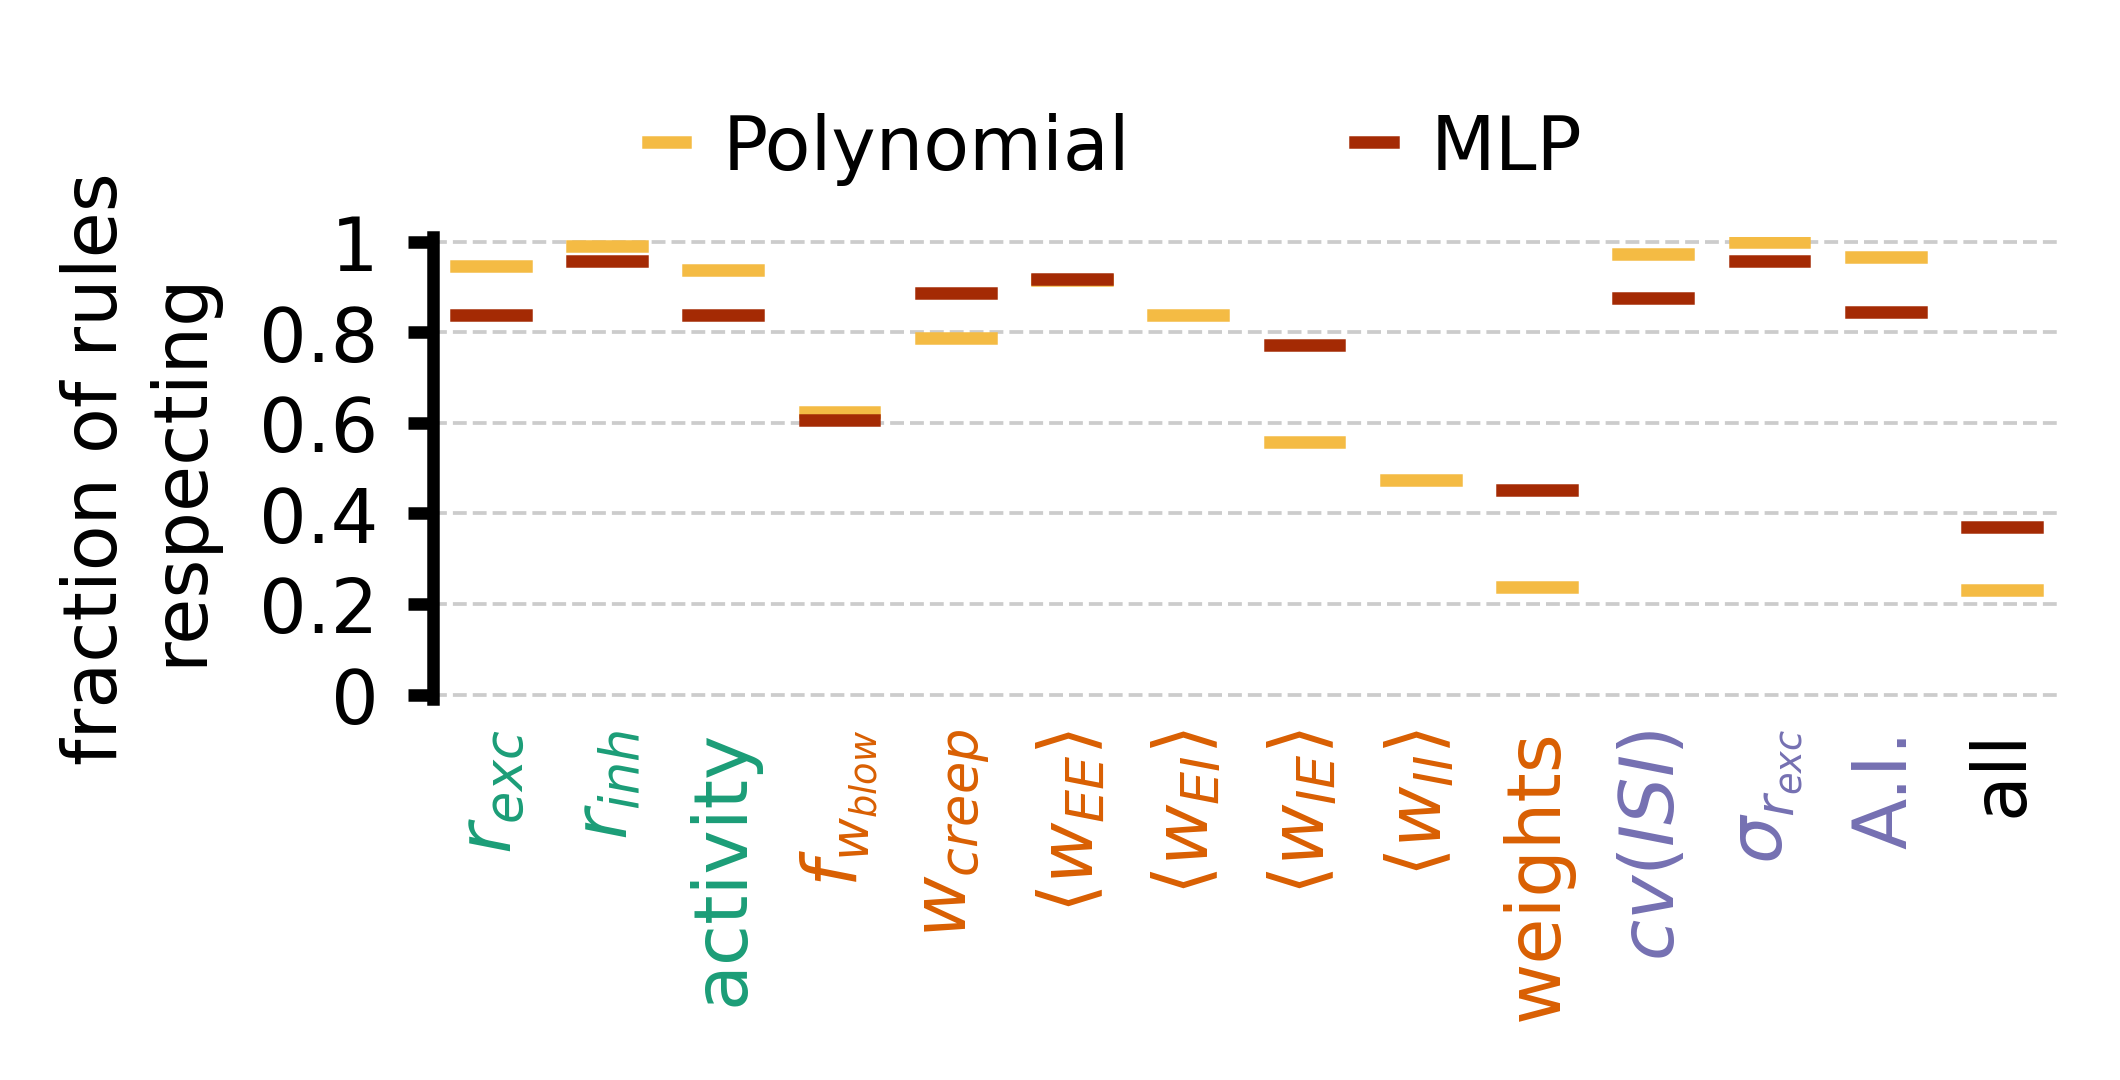

In [56]:
aux.frac_metrics_longevity(fracs_list1=fracs_list_poly,
                           fracs_list2=fracs_list_MLP,
                      colors_plot=["#F4BB44","#A42A04"],
                      figsize=(3.5, 1),
                      ylim=[-0.01,1.01],
                      yticks=[0,0.2,0.4,0.6,0.8,1],
                      yticklabels=[0,0.2,0.4,0.6,0.8,1],
                      xlabel=None,
                      xticklabels=[r'$r_{exc}$', r'$r_{inh}$', "activity",
                                   r'$f_{w_{blow}}$', r'$w_{creep}$', r'$\langle w_{EE} \rangle$', r'$\langle w_{EI} \rangle$', r'$\langle w_{IE} \rangle$', r'$\langle w_{II} \rangle$', "weights",
                                   r'$cv(ISI)$', r'$\sigma_{r_{exc}}$', "A.I.",
                                   "all"],
                      ylabel="fraction of rules\nrespecting",
                      linewidth=1.5,
                      axwidth=1.5,
                      font="Arial",
                      fontsize=9,
                      xlim=[-0.5,len(fracs_list_poly)-0.5],
                      ms=0,
                           rotation_xlabel=90,
                      marker="o",
                           x_loc_leg=0.1,
                           y_loc_leg=1,
                      xlabel_colors = [color_pi1 for i in range(3)]+[color_pi2 for i in range(7)]+[color_pi3 for i in range(3)]+["black"],
                      l=0.3)

### Dimensionality reduction, poly

In [57]:
dataset_to_reduce_poly = dataset_poly[condition_poly]['theta'][:,:-1]
pca_poly = decomposition.PCA(whiten=False)
pca_poly.fit(dataset_to_reduce_poly)
sr_pca_poly = pca_poly.fit_transform(dataset_to_reduce_poly)

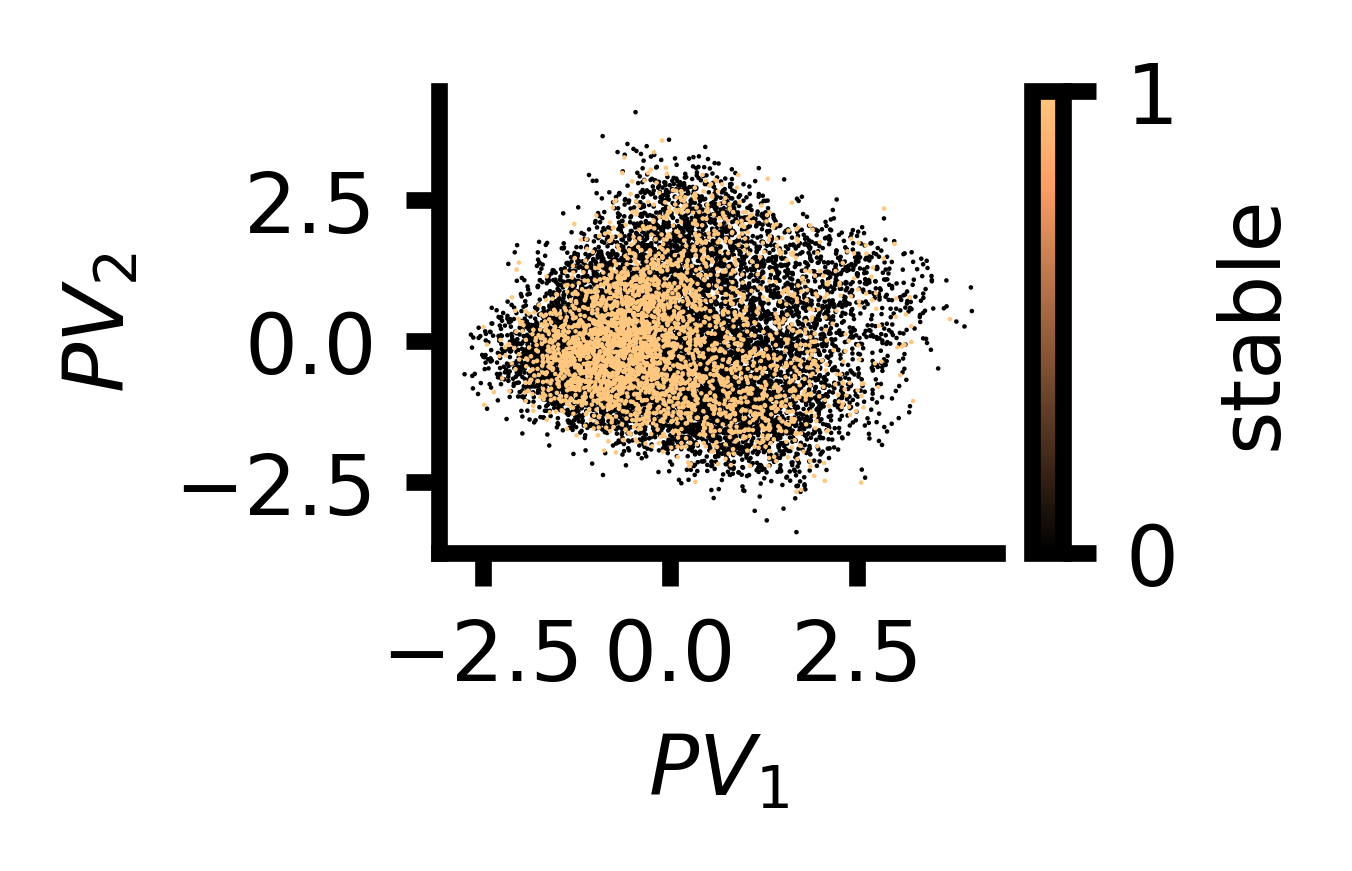

In [58]:
aux.plot_2data_1heatmap(sr_pca_poly[:, 0], 
                        sr_pca_poly[:, 1], 
                        stable_poly, 
                        r'$PV_{1}$', 
                              r'$PV_{2}$', 
                              "stable",
                              s=0.3,
                              figsize=(1.5,1),
                        cbarticks=[0,1],
                            dpi=600,
                       cmap="copper",
                        fontsize=10,
                       linewidth=2,
                       ordering=True)

#### Dimensionality reduction MLP

In [59]:
pca_MLP = decomposition.PCA(whiten=False)
pca_MLP.fit(dataset_to_reduce_MLP)
sr_pca_MLP = pca_MLP.fit_transform(dataset_to_reduce_MLP)

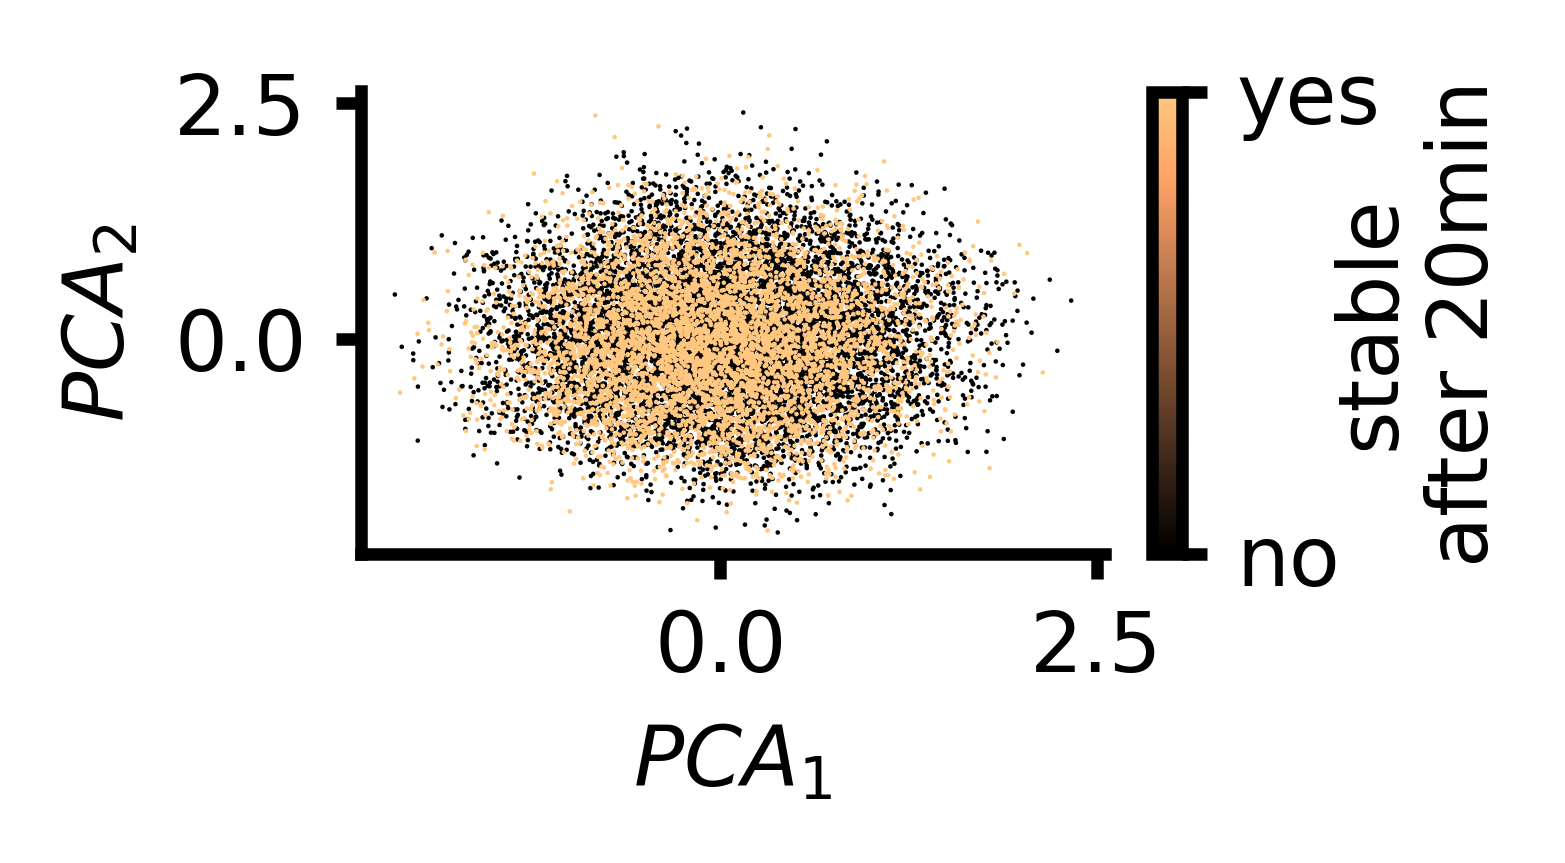

In [60]:
aux.plot_2data_1heatmap(sr_pca_MLP[:, 0], 
                              sr_pca_MLP[:, 1], 
                       stable_MLP, 
                              r'$PCA_{1}$', 
                              r'$PCA_{2}$', 
                              "stable\nafter 20min",
                              s=0.3,
                              figsize=(2,1),
                        cbarticks=[0,1],
                        cbarticklabels=["no", "yes"],
                        cbarhandlepad=-6,
                            dpi=600,
                       cmap="copper",
                        fontsize=10,
                       linewidth=1.5,
                       ordering=True)

#### Structure compared to meanfield (poly)

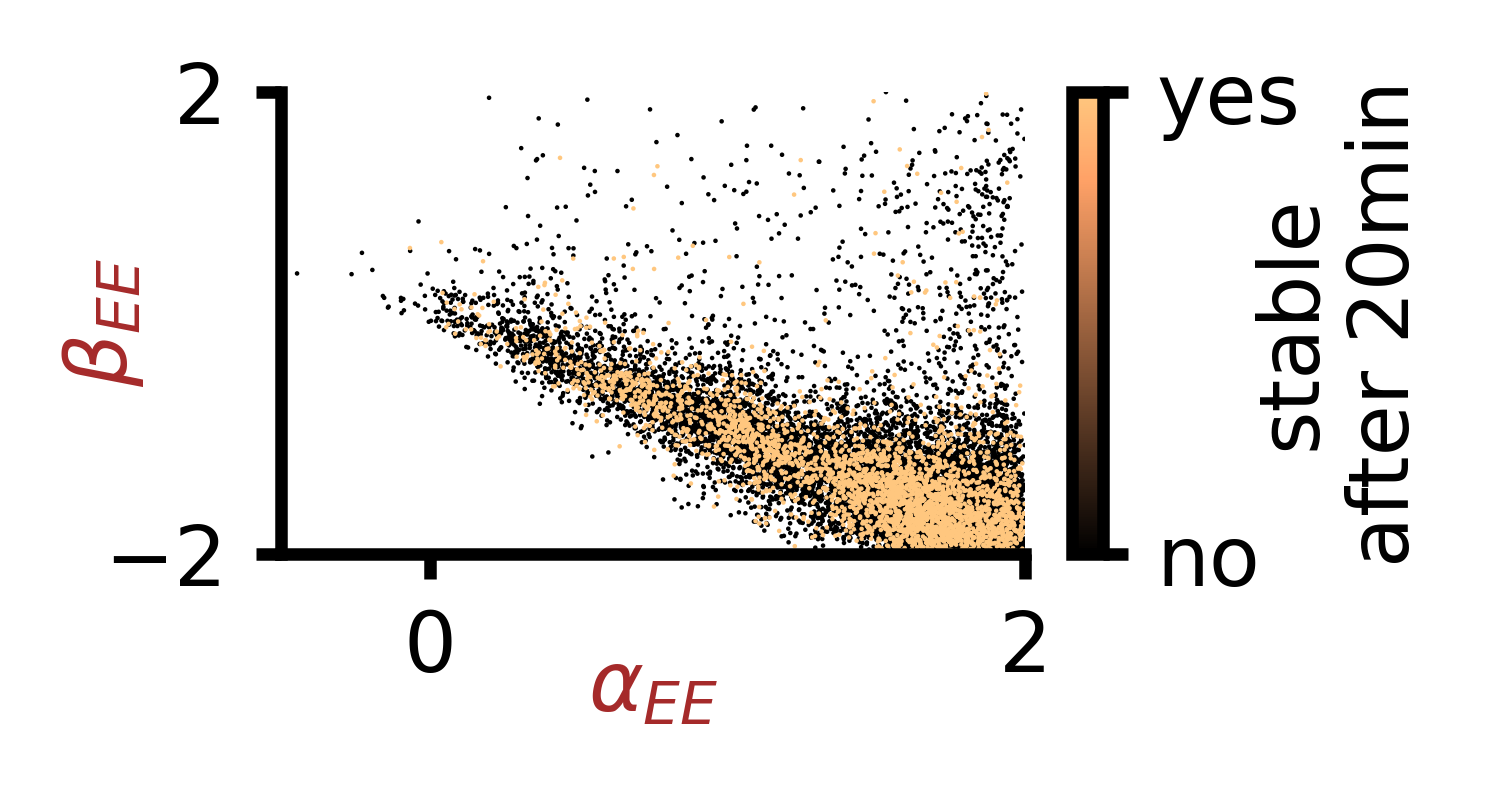

In [61]:
aux.plot_2data_1heatmap(alpha_EE, beta_EE, stable_poly, 
                        r'$\alpha_{EE}$', r'$\beta_{EE}$', "stable\nafter 20min", 
                        s=0.3,
                              figsize=(2,1),
                        cbarticks=[0,1],
                        cbarticklabels=["no", "yes"],
                        cbarhandlepad=-6,
                            dpi=600,
                        xlim = [-0.5,2],
                      ylim = [-2,2],
                      xticks = [0,2],
                      yticks = [-2,2],
                       cmap="copper",
                        fontsize=10,
                       linewidth=1.5,
                        color_xlabel=color_ee,
                        color_ylabel=color_ee,
                        xhandlepad=-5,
                        yhandlepad=-5,
                       ordering=True)

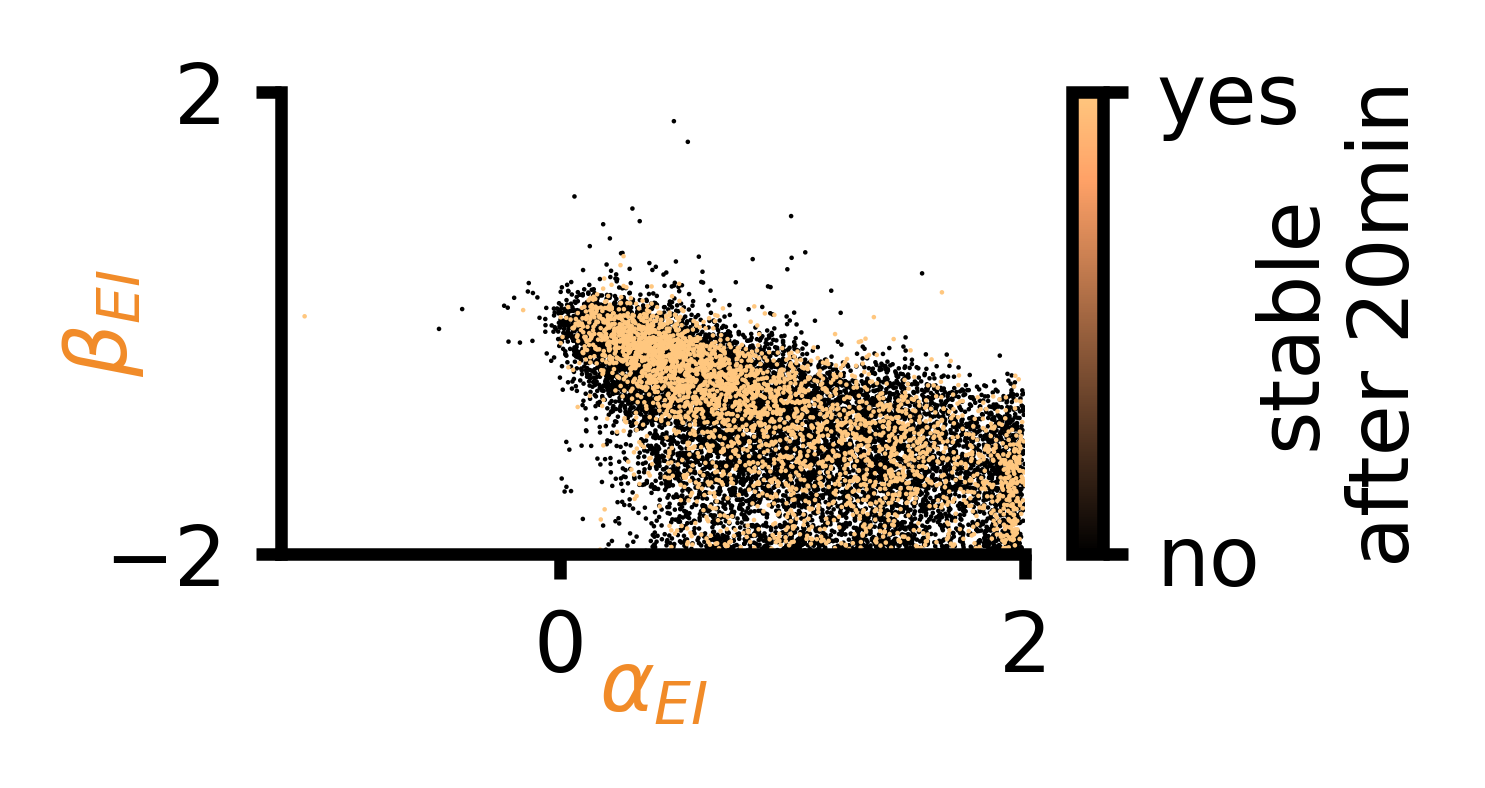

In [62]:
aux.plot_2data_1heatmap(alpha_EI, beta_EI, stable_poly, 
                        r'$\alpha_{EI}$', r'$\beta_{EI}$', "stable\nafter 20min", 
                        s=0.3,
                              figsize=(2,1),
                        cbarticks=[0,1],
                        cbarticklabels=["no", "yes"],
                        cbarhandlepad=-6,
                            dpi=600,
                       cmap="copper",
                        xlim = [-1.2,2],
                      ylim = [-2,2],
                      xticks = [0,2],
                      yticks = [-2,2],
                        fontsize=10,
                       linewidth=1.5,
                        color_xlabel=color_ei,
                        color_ylabel=color_ei,
                        xhandlepad=-5,
                        yhandlepad=-5,
                       ordering=True)

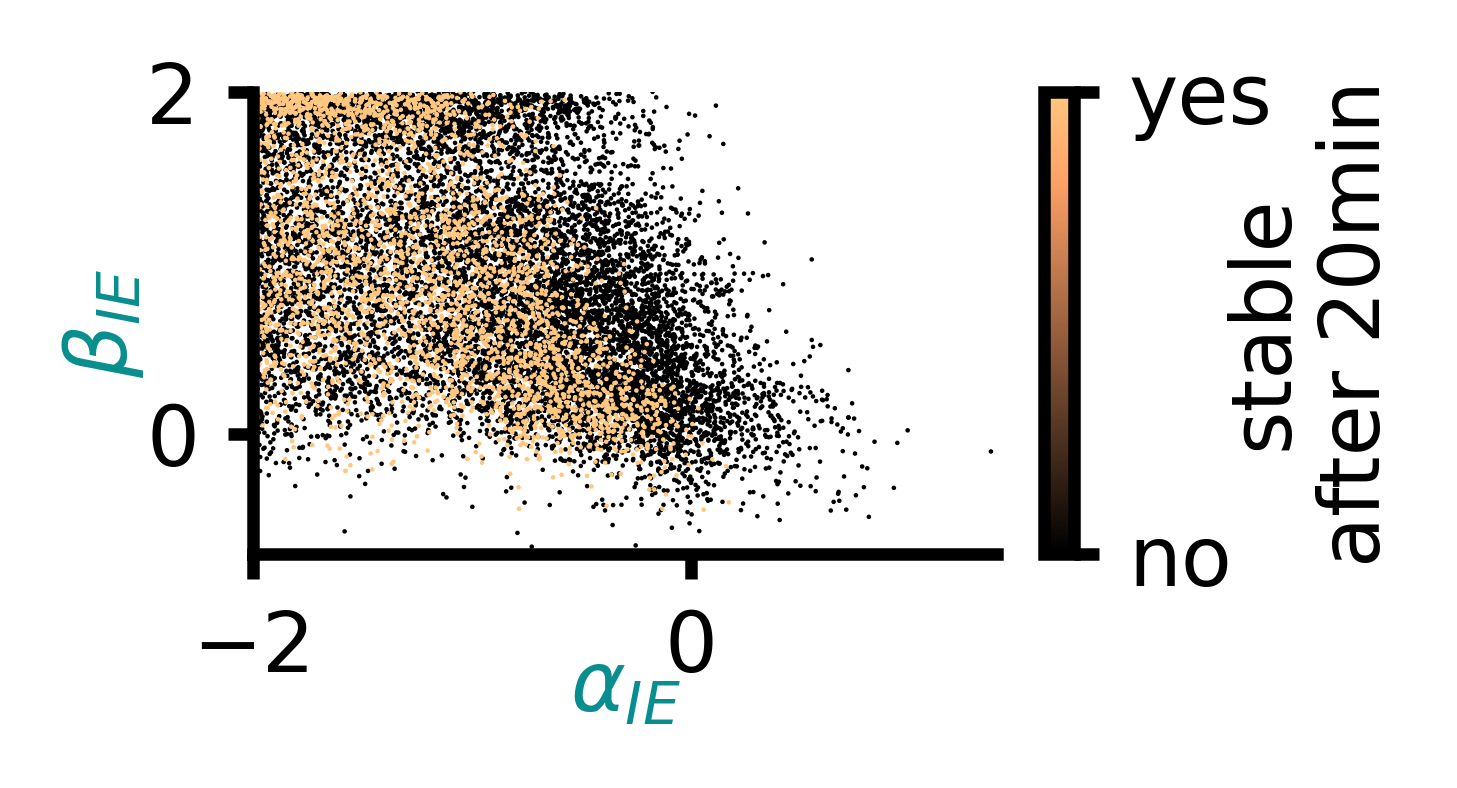

In [63]:
aux.plot_2data_1heatmap(alpha_IE, beta_IE, stable_poly, 
                        r'$\alpha_{IE}$', r'$\beta_{IE}$', "stable\nafter 20min", 
                        s=0.3,
                              figsize=(2,1),
                        cbarticks=[0,1],
                        cbarticklabels=["no", "yes"],
                        cbarhandlepad=-6,
                            dpi=600,
                       cmap="copper",
                        fontsize=10,
                       linewidth=1.5,
                       ordering=True,
                       xlim = [-2,1.4],
                      ylim = [-0.7,2],
                      xticks = [-2,0],
                      yticks = [0,2],
                       color_xlabel=color_ie,
                        color_ylabel=color_ie,
                       xhandlepad=-5,
                        yhandlepad=0,)

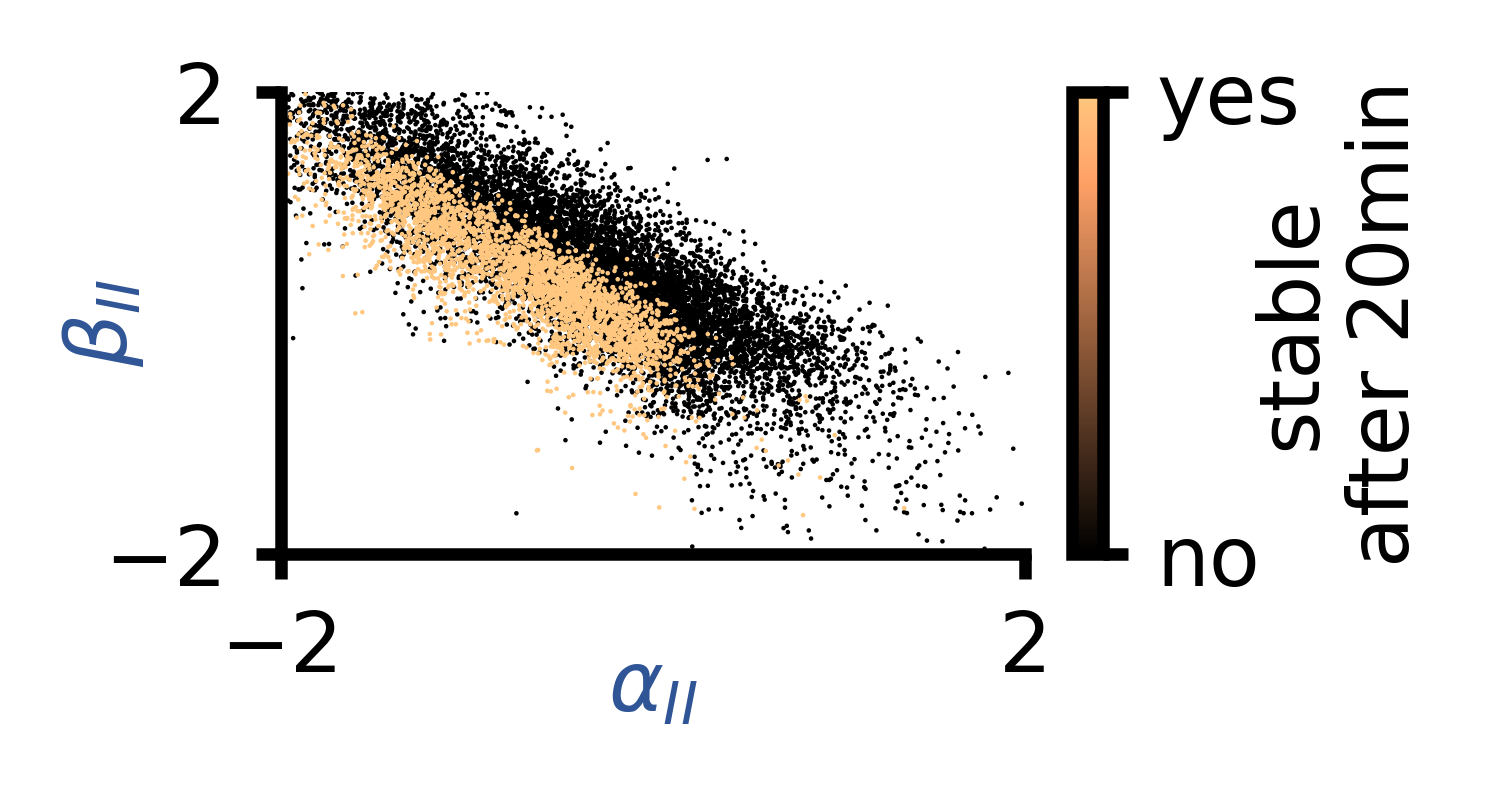

In [64]:
aux.plot_2data_1heatmap(alpha_II, beta_II, stable_poly, 
                        r'$\alpha_{II}$', r'$\beta_{II}$', "stable\nafter 20min", 
                        s=0.3,
                              figsize=(2,1),
                        cbarticklabels=["no", "yes"],
                        cbarhandlepad=-6,
                        cbarticks=[0,1],
                            dpi=600,
                       cmap="copper",
                        fontsize=10,
                       linewidth=1.5,
                       ordering=True,
                       xlim = [-2,2],
                      ylim = [-2,2],
                      xticks = [-2,2],
                      yticks = [-2,2],
                       color_xlabel=color_ii,
                        color_ylabel=color_ii,
                       xhandlepad=-5,
                        yhandlepad=-5,)